In [7]:
%reload_ext autoreload
%autoreload 2

from dev.data import get_err_dicts_infoPerfo
from dev.plotter import plot_error_rates


DEVICE = 'ibm_sherbrooke'
STATE = 'X0'
ROUNDS = 50

file_name = f'../results/InfoPerfo/{DEVICE}_{STATE}_{ROUNDS}.json'

err_per_method = get_err_dicts_infoPerfo(file_name)

print(err_per_method)

Number of jobs: 20

{'nBits_list': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, -1], 's_K': {3: array([461757, 453565, 450893, 451439, 456181, 452288, 452185, 453352,
       452955, 452986, 452847, 452856, 452853]), 5: array([287163, 276572, 273366, 272365, 273288, 271882, 271172, 271374,
       271266, 271277, 271212, 271235, 271227]), 7: array([178405, 165807, 162243, 162808, 163944, 162634, 162141, 162037,
       161965, 162007, 161935, 161952, 161950]), 9: array([112726, 101645,  97987,  97620,  98609,  98099,  97646,  97541,
        97473,  97542,  97501,  97501,  97506]), 15: array([29236, 25147, 22363, 21757, 22127, 21557, 21359, 21336, 21319,
       21312, 21304, 21305, 21313]), 21: array([3913, 2928, 2396, 2232, 2271, 2215, 2165, 2144, 2150, 2155, 2151,
       2143, 2143]), 27: array([434, 264, 177, 187, 175, 167, 156, 157, 158, 157, 157, 157, 157]), 33: array([117,  53,  42,  41,  43,  41,  38,  43,  37,  38,  38,  39,  39]), 39: array([37, 14, 10, 10, 13, 13, 11,  8,  9,  9,  9, 

# Plotting

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

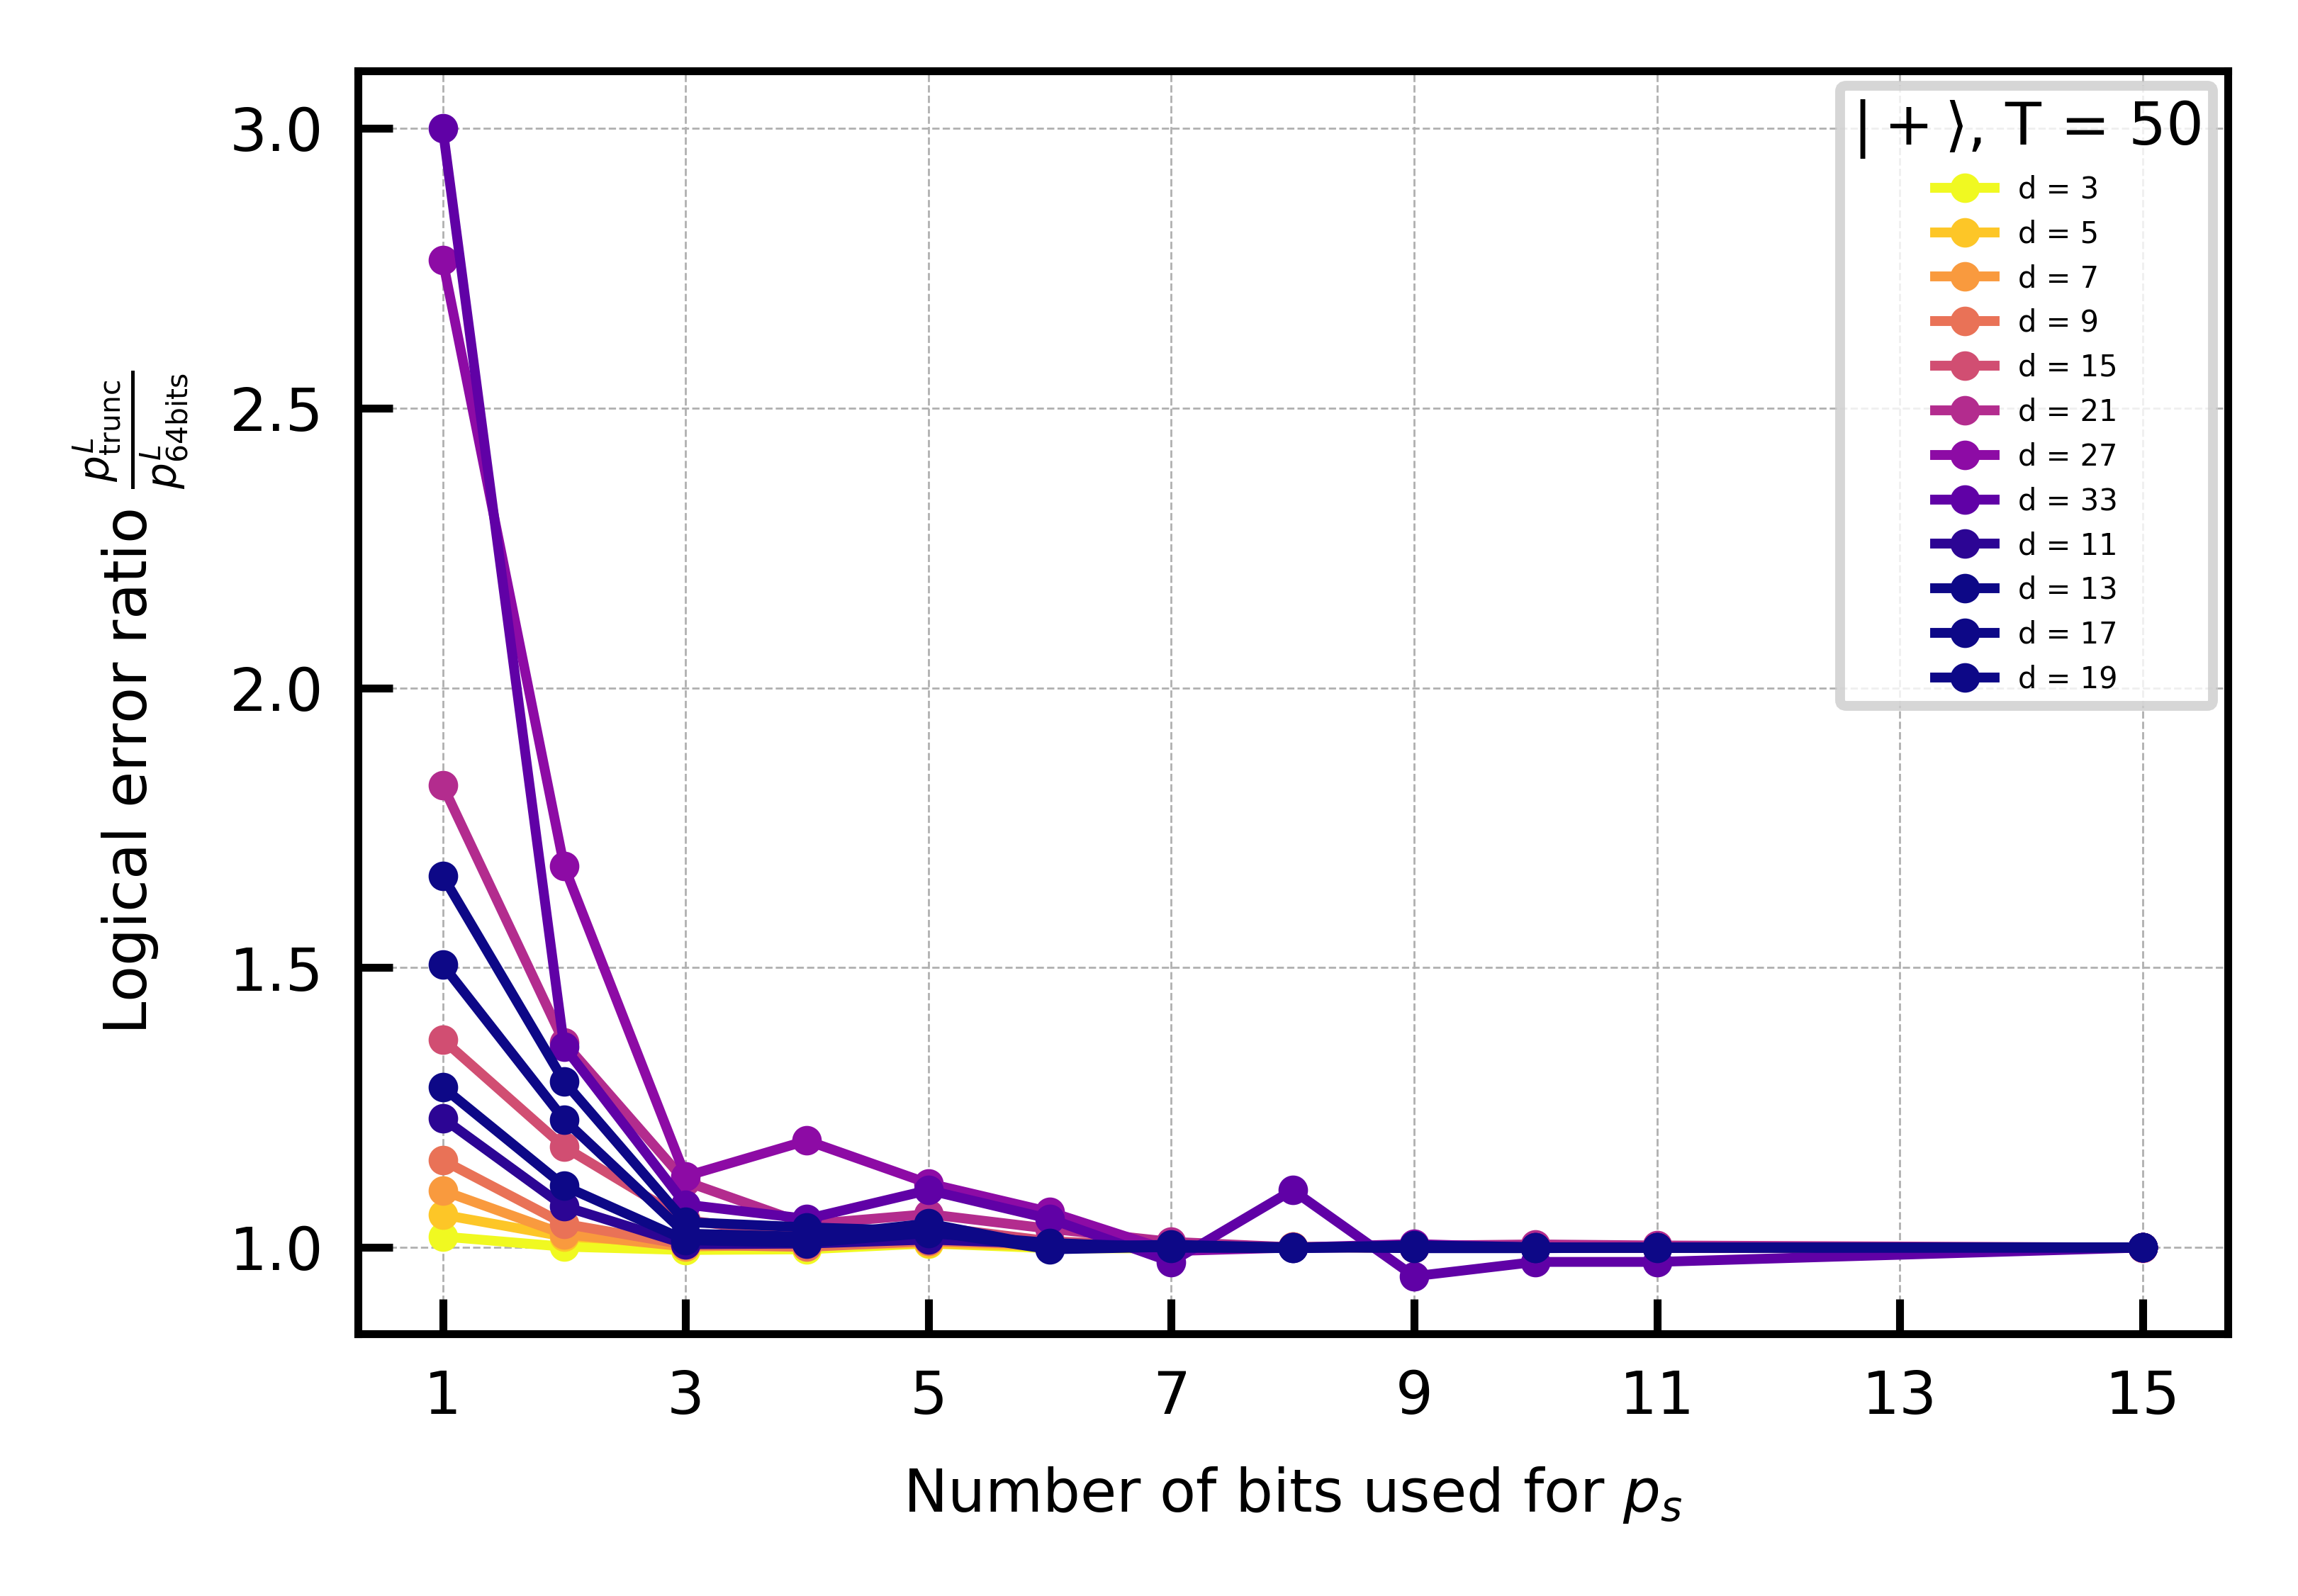

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Setup plot parameters for PRX style
FIGURE_WIDTH_1COL = 3.404
FIGURE_HEIGHT_1COL_GR = FIGURE_WIDTH_1COL * 2 / (1 + np.sqrt(5)) * 1.1
font_size = 6
plt.rcParams.update({
    'font.size': font_size,
    'figure.titlesize': 'medium',
    'figure.dpi': 1000,
    'figure.figsize': (FIGURE_WIDTH_1COL, FIGURE_HEIGHT_1COL_GR),
    'axes.titlesize': 'medium',
    'axes.axisbelow': True,
    'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.direction': 'in',
    'ytick.labelsize': 'small',
    'image.interpolation': 'none',
    'legend.fontsize': font_size,
    'axes.labelsize': font_size,
    'axes.titlesize': font_size,
    'xtick.labelsize': font_size,
    'ytick.labelsize': font_size,
    'font.family': 'sans-serif',
})

# get the plasma color map
cmap = matplotlib.colormaps['plasma']

for method in err_per_method:
    if method == 'nBits_list':
        nBits_list = err_per_method[method]
        colors = iter(cmap(np.linspace(-0.3, 1, len(nBits_list[:-1])))[::-1])
        continue
    elif method  != 's_K':
        continue
    for distance, errs in err_per_method[method].items():
        if distance > 33:
            continue
        err_ratio = errs[:-1]/errs[-1]
        plt.plot(nBits_list[:-1], err_ratio, label=f"d = {distance}", marker='o', markersize=2, linewidth=1, color=next(colors))

plt.xlabel(r'Number of bits used for $p_s$')
plt.ylabel(r'Logical error ratio $\frac{p^L_{\text{trunc}}}{p^L_{64 \text{bits}}}$')
plt.xticks(range(1, 16, 2))
plt.grid(True, which="both", linestyle='--', linewidth=0.2)
state = r'|+\rangle' if STATE == 'X0' else r'|0\rangle'
plt.legend(fontsize=3, loc='upper right', title=fr'$|+\rangle$, T = {ROUNDS}')
plt.title
